<a href="https://colab.research.google.com/github/dimahdera/COS-IMGS-389-Spring-2024/blob/main/Decision_tree_learning_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The decision tree learning algorithm recursively learns the tree as follows:

1.   Assign all training instances to the root of the tree. Set curent node to root node.
2.   For each attribute Partition all data instances at the node by the value of the attribute.
3. Compute the information gain ratio from the partitioning.
4. Identify feature that results in the greatest information gain ratio. Set this feature to be the splitting criterion at the current node.
5. If the best information gain ratio is 0, tag the current node as a leaf and return.
6. Partition all instances according to attribute value of the best feature.
7. Denote each partition as a child node of the current node.
8. For each child node: a. If the child node is “pure” (has instances from only one class) tag it as a leaf and return. b. If not set the child node as the current node and recurse to step 2.

Based on above we would be required to write following functions to create the decision tree

1. Function to identify partition values for all attribute
2. Split the data into 2 using the partition value
3. Function to calculate entropy
4. Function to calculate information Gain. Function to identify the best feature and value to particition on using entropy and information gain
5. Function to check Purity. Check each split if Data is Pure (0 information Gain), then stop for that split Else iterate through recursively
6. Function to return classification from leaf node






In [1]:
# Importing Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
%matplotlib inline

In [2]:
df = pd.read_csv("Iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# **1 -Function to identify partition values for all attribute**
It should take the data and labels and return all the potential splits for all columns
How can we get all the potential splits.

1. Iterate through each attribute
2. identify the unique values for that attribute
3. store the unique values with the attribute index in a dictionary and return the dictionary

In [22]:
def all_potential_splits(data):
    # 1 - Create an empty dictionary, we will create our splits and store the splits in this dictionary.
    #      The format of the dictionary will be {col_index:[list of all possible values]}
    potential_splits ={}
    # 2   Since we need to iterate through each column in the dataset we would need the column count. Row count is
    n_row , n_col = data.shape
    # 3   In this Step we are iterating through each column in the dataset identifying the unique values and
    #     storing the values in our dictionary with that column index
    for col_index in range(n_col-1):
        values = data[:,col_index]
        unique_values = np.unique(values)
        potential_splits[col_index] = unique_values
    return potential_splits

In [4]:
potential_splits = all_potential_splits(df.drop("species",axis=1).values)
pprint(potential_splits)

{0: array([4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5,
       5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8,
       6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.6, 7.7, 7.9]),
 1: array([2. , 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3,
       3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.4]),
 2: array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.9, 3. , 3.3, 3.5, 3.6,
       3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9,
       5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.3,
       6.4, 6.6, 6.7, 6.9]),
 3: array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6,
       1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5])}


In [5]:
df.drop("species",axis=1)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# **2 - Split the data into 2 using the partition value**

How to split the dataset into 2 based on some value

1. First thing that we need to understand is that we need to split the whole dataset not single column.
2. Identify the type of column whether it is continous or categorical. For simplicity sake lets assume string values as categorical and others as continous.
3. We can simply iterate through all values in the split column check below condition a. If variable is continous , check if value is <= to split value b. If variable is categorical, check if value is == to split value
4. Rows which will satisfy the condition will be stored in left dataset
5. Rows that don't satisfy the condition will get stored in right dataset
6. Return the left dataset and right dataset

lets use iris flower dataset check the function. Lets arbitarily assign 0.8 as split_value and 3 as split_column (same example we have been using, becuase this value should separate the sentosa species )

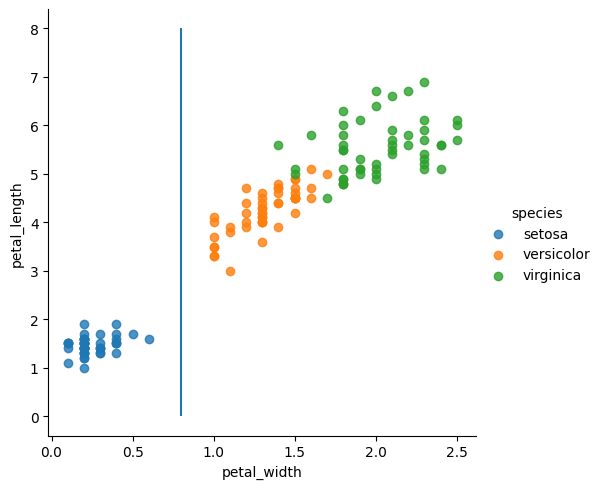

In [6]:

def determine_type_of_feature(df,n_unique_values_treshold = 10):

    feature_types = []

    for feature in df.columns:
        if feature != "label":
            unique_values = df[feature].unique()
            example_value = unique_values[0]

            if (isinstance(example_value, str)) or (len(unique_values) <= n_unique_values_treshold):
                feature_types.append("categorical")
            else:
                feature_types.append("continuous")

    return feature_types


def split_data(data,split_column,split_value):
    column_values = data[:,split_column]
    FEATURE_TYPES = determine_type_of_feature(df)
    type_of_feature = FEATURE_TYPES[split_column]

    if type_of_feature == "continuous":
        left_dataset = data[column_values <= split_value]
        right_dataset = data[column_values > split_value]
    else:
        left_dataset = data[column_values == split_value]
        right_dataset = data[column_values != split_value]
    return left_dataset, right_dataset


ld,rd = split_data(df.values,3,0.8)
# Data before the split
sns.lmplot(data=df,x="petal_width",y="petal_length",hue="species",fit_reg=False)
plt.vlines(x=0.8,ymin=0,ymax=8)

**3 - Function to calculate entropy**


In [7]:
def calculate_entropy(data):
    label = data[:,-1]
    _,counts = np.unique(label,return_counts=True)

    probabilities = counts/counts.sum()
    entropy = sum(probabilities * -np.log2(probabilities))
    return entropy
#function to calculate entropy after split

def weighted_child_entropy(left_dataset,right_dataset):
    total_len = len(left_dataset) + len(right_dataset)
    left_dataset_entropy = calculate_entropy(left_dataset)
    right_dataset_entropy = calculate_entropy(right_dataset)

    child_entropy = len(left_dataset)/total_len * left_dataset_entropy + len(right_dataset)/total_len * right_dataset_entropy
    return child_entropy
left_dataset,right_dataset = split_data(df.values,3,0.8)
# validating whether code is working well in the function
print('Entropy of Parent Dataset {}'.format(calculate_entropy(df.values)))
print('Weighted entropy of child {}'.format(weighted_child_entropy(left_dataset,right_dataset)))


Entropy of Parent Dataset 1.584962500721156
Weighted entropy of child 0.6666666666666666


# **4 - Function to identify the best feature and value to particition on using entropy and information gain**

How to identify the best split. Given we have the dataset and list of all available splits

1. calculate the entropy of the data. Store the entropy as best entropy.
2. Loop through all the indexs in the potential_splits dictionary, i.e. loop through all the column A. loop through all values for each column i. split_data for each column,split_value pair in potential splits into left dataset and right dataset
ii. calculate weighted entropy of child datasets (left_dataset and right_dataset)
iii. if child entropy is less than best_entropy a. Store the split_value and split_column in best_split_value and best_split_column b. best entropy == child entropy
iv. else continue
3. return best_split_value and best_split_column

In [8]:
data = df.values
potential_splits = all_potential_splits(data)

def best_split(data,potential_splits):
    parent_entropy = calculate_entropy(data)
    best_entropy = parent_entropy

    for index in potential_splits:
        for value in potential_splits[index]:
            left_dataset,right_dataset = split_data(data,index,value)
            child_entropy = weighted_child_entropy(left_dataset,right_dataset)
            if child_entropy < best_entropy:
                best_split_column = index
                best_split_value = value
                best_entropy = child_entropy
                information_gain = parent_entropy - best_entropy

    return best_split_column , best_split_value, parent_entropy, information_gain, best_entropy
best_split_column , best_split_value, parent_entropy, information_gain, best_entropy = best_split(data,potential_splits)
print('split_column {} split_value {} best entropy {} parent entropy {} information gain {}'.format(best_split_column,best_split_value,best_entropy, parent_entropy,information_gain))

split_column 2 split_value 1.9 best entropy 0.6666666666666666 parent entropy 1.584962500721156 information gain 0.9182958340544894


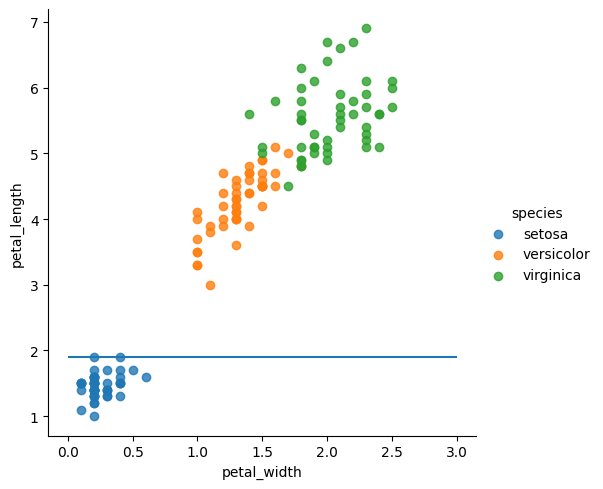

In [9]:
# visualize Data before the split
sns.lmplot(data=df,x="petal_width",y="petal_length",hue="species",fit_reg=False)
plt.hlines(y=best_split_value,xmin=0,xmax=3)

# **5- Check each split if Data is Pure**

1. select the target column or the label column from the dataset.
2. Check the unique values in the label column
Return True, If their is only one unique value it will mean that Data is Pure and all rows in the dataset belong to only one class
3. Else Return False

Using the original dataset
Data is Pure:  False


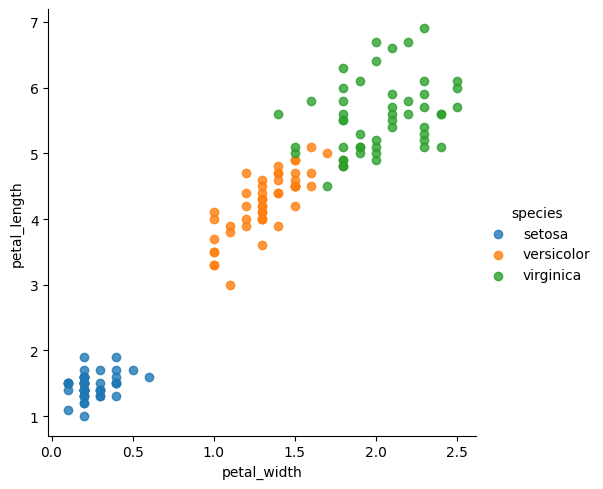

In [10]:
def check_purity(data):
    label = data[:,-1]
    unique_classes,unique_class_count = np.unique(label,return_counts=True)

    if len(unique_classes) == 1:
        return True
    else:
        return False


print('Using the original dataset')
sns.lmplot(data=df,x="petal_width",y="petal_length",hue="species",fit_reg=False)
data = df.values
column_names = df.columns

out = check_purity(data)
print("Data is Pure: ", out)

Using the left dataset after splitting on column 2 and split value 1.9
Data is Pure:  True


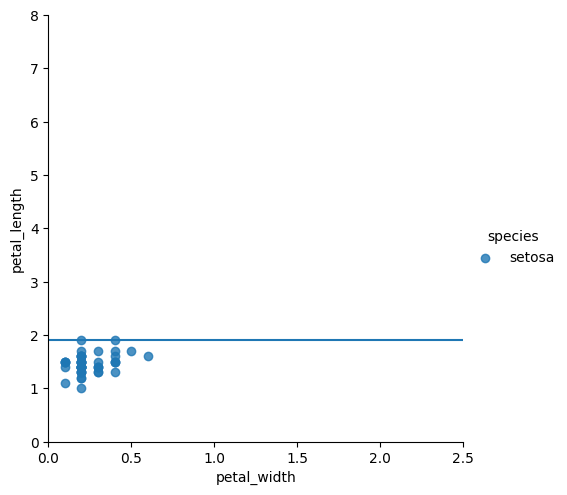

In [11]:
print('Using the left dataset after splitting on column 2 and split value 1.9')
left_dataset,right_dataset = split_data(data,2,1.9)
ld = pd.DataFrame(left_dataset,columns=column_names)
sns.lmplot(data=ld,x="petal_width",y="petal_length",hue="species",fit_reg=False)
plt.hlines(y=1.9,xmin=0,xmax=3)
plt.xlim(0,2.5)
plt.ylim(0,8)

out = check_purity(left_dataset)
print("Data is Pure: ", out)

Using the right dataset after splitting on column 2 and split value 1.9
Data is Pure:  False


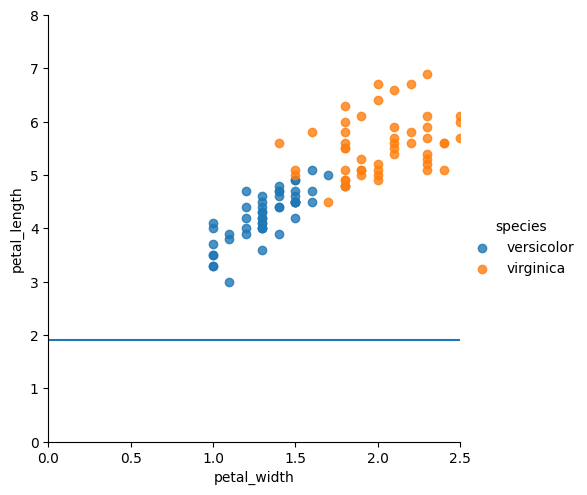

In [12]:
print('Using the right dataset after splitting on column 2 and split value 1.9')

data = df.values
left_dataset,right_dataset = split_data(data,2,1.9)

rd = pd.DataFrame(right_dataset,columns=column_names)
sns.lmplot(data=rd,x="petal_width",y="petal_length",hue="species",fit_reg=False)
plt.hlines(y=1.9,xmin=0,xmax=3)
plt.xlim(0,2.5)
plt.ylim(0,8)
out = check_purity(right_dataset)
print("Data is Pure: ", out)

# **6- Function to return classification from leaf node**

If we take case that classify function will be called only when data is pure then a simple statement like

"return np.unique(data[:,-1])" will be enough

But that will not be the case always, mostly because of min_leaf concept. min_samples_leaf :- The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches

This is to avoid overfitting. Otherwise the decision tree will overfit the training data and will give 100% accuracy but will strugle when it will try to classify new data.

how to make this function

1. get the label column from the dataset
2. get unqiue classes and their count from label column
3. Choose the class with maximum count
4. Return the class

In [13]:
def classify(data):
    label = data[:,-1]
    unique_classes,unique_count = np.unique(label,return_counts=True)

    class_index = unique_count.argmax()
    classification = unique_classes[class_index]

    return classification

print('Class before split', classify(df.values))
print('Class after split for left child node', classify(left_dataset))
print('Class after split for right child node', classify(right_dataset))

Class before split setosa
Class after split for left child node setosa
Class after split for right child node versicolor


# **Creating a decision Tree**



1. Identifying potential splits
2. Splitting data into 2 datasets
3. calculating the entropy
4. calculating child entropy
5. Identifying the best split from list of potential splits using entropy
6. checking purity of data
7. classifying the leaf node




In [25]:
def create_decision_tree(df,min_samples=3,counter=0,max_depth=5):

        # data preparations
    if counter == 0:
        global COLUMN_HEADERS, FEATURE_TYPES
        COLUMN_HEADERS = df.columns
        FEATURE_TYPES = determine_type_of_feature(df)
        data = df.values
    else:
        data = df


    if check_purity(data) or (len(data) < min_samples) or (counter == max_depth):
        classification =  classify(data)
        return classification


    else:
        counter += 1
    #    print(counter)
        potential_splits = all_potential_splits(data)
     #   print(potential_splits)
        split_column,split_value, parent_entropy, information_gain, best_entropy = best_split(data,potential_splits)
        left_dataset, right_dataset = split_data(data,split_column,split_value)


        if len(left_dataset) == 0 or len(right_dataset) == 0:
            classification = classify(data)
            return classification

        feature_name = COLUMN_HEADERS[split_column]
     #   print(FEATURE_TYPES)
     #   print(split_column)
        type_of_feature = FEATURE_TYPES[split_column]
        if type_of_feature == "continuous":
            question = "{} <= {}".format(feature_name, split_value)

        # feature is categorical
        else:
            question = "{} = {}".format(feature_name, split_value)

        tree = {question: []}

        yes_answer = create_decision_tree(left_dataset,min_samples,counter,max_depth)

        no_answer = create_decision_tree(right_dataset,min_samples,counter,max_depth)

        if yes_answer == no_answer:
            tree = yes_answer
        else:
            tree[question].append(yes_answer)
            tree[question].append(no_answer)
        return tree

def fit(train_data,train_label):
    train_data["label"] = train_label
    tree = create_decision_tree(train_data)
    return tree

df = pd.read_csv("Iris.csv")
data = df.drop('species',axis=1)
y = df['species']
print(data.shape,y.shape)
tree = fit(data,y)
pprint(tree)

(150, 4) (150,)
{'petal_length <= 1.9': ['setosa',
                         {'petal_width <= 1.7': [{'petal_length <= 4.9': [{'petal_width <= 1.6': ['versicolor',
                                                                                                  'virginica']},
                                                                          {'petal_width <= 1.5': ['virginica',
                                                                                                  {'sepal_length <= 6.7': ['versicolor',
                                                                                                                           'virginica']}]}]},
                                                 {'petal_length <= 4.8': [{'sepal_length <= 5.9': ['versicolor',
                                                                                                   'virginica']},
                                                                          'virginica']}]}]}


In [26]:
def classify_example(test, tree):
    question = list(tree.keys())[0]
    feature_name, comparison_operator, value = question.split(" ")

    # ask question
    if comparison_operator == "<=":
        if test[feature_name] <= float(value):
            answer = tree[question][0]
        else:
            answer = tree[question][1]

    # feature is categorical
    else:
        if str(test[feature_name]) == value:
            answer = tree[question][0]
        else:
            answer = tree[question][1]

    # base case
    if not isinstance(answer, dict):
        return answer

    # recursive part
    else:
        residual_tree = answer
        return classify_example(test, residual_tree)
def predict(test,tree):
    output = []
    index = test.index.tolist()
    for i in index:
        output.append(classify_example(test.loc[i],tree))
    return output

def predict(test,tree):
    output = []
    index = test.index.tolist()
    for i in index:
        output.append(classify_example(test.loc[i],tree))
    return output

df = pd.read_csv("Iris.csv")
data = df.drop('species',axis=1)
y = df['species']
print(data.shape,y.shape)
tree = fit(data,y)

output = predict(data,tree)

accuracy = (y==output)
accuracy = accuracy.mean()
print('Accuracy of prediction is  {} '.format(accuracy))

(150, 4) (150,)
Accuracy of prediction is  1.0 


Accuracy is 1 beacuse the training and testing data are same. Which is a bad idea. Lets just separate the training and testing samples and check the accuracy again

In [27]:
import random

df = pd.read_csv("Iris.csv")
test_size = 50
indices = df.index.tolist()
test_indices = random.sample(population=indices, k=test_size)

test_df = df.loc[test_indices]
train_df = df.drop(test_indices)

X_train = train_df.drop('species',axis=1)
y_train = train_df['species']

X_test = test_df.drop('species',axis=1)
y_test = test_df['species']


# Building the Tree
tree = fit(X_train,y_train)

# Predicting on the test data
test_output = predict(X_test,tree)

# Checking the accuracy
Accuracy = (y_test == test_output)
Accuracy = Accuracy.mean()
print('Accuracy of prediction is  {} '.format(Accuracy))

Accuracy of prediction is  0.98 
